In [279]:
# import pandas as pd

# # Load CSV file into a DataFrame
# df = pd.read_csv('combine.csv')

# # Display the first few rows of the DataFrame
# print(df.head())

In [280]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler         #Extracting Stock data from yahoo finance
stock = yf.Ticker("ADANIPORTS.NS")
print(stock)
stock.history(period='5d')

yfinance.Ticker object <ADANIPORTS.NS>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-26 00:00:00+05:30,1281.599976,1314.000000,1281.000000,1304.199951,3610644,0.0,0.0
2024-03-27 00:00:00+05:30,1315.000000,1343.000000,1312.099976,1322.800049,4938400,0.0,0.0
2024-03-28 00:00:00+05:30,1334.000000,1358.699951,1314.000000,1341.849976,4188741,0.0,0.0
2024-04-01 00:00:00+05:30,1356.800049,1381.750000,1350.250000,1375.900024,3251462,0.0,0.0
2024-04-02 00:00:00+05:30,1397.800049,1424.949951,1388.199951,1404.150024,5767919,0.0,0.0


# LSTM

In [281]:
df=stock.history(start='2000-11-01', end='2024-04-01', actions=False)   # Data Verification
print(df.shape)
df.head()

(4026, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2007-11-27 00:00:00+05:30,140.731279,189.164771,140.731279,175.274414,27262365
2007-11-28 00:00:00+05:30,177.284876,180.757469,159.857949,161.749603,21958915
2007-11-29 00:00:00+05:30,165.404924,167.049838,153.945385,162.115097,25616715
2007-11-30 00:00:00+05:30,162.663402,174.908843,162.663402,169.791351,23047035
2007-12-03 00:00:00+05:30,171.756138,181.726130,168.512005,179.112549,14578850


In [282]:
print(df.isnull().sum())
df=df.drop(['Open','High','Volume','Low'],axis=1)   # Data Preprocessing
df.head()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


,Close
Date,
2007-11-27 00:00:00+05:30,175.274414
2007-11-28 00:00:00+05:30,161.749603
2007-11-29 00:00:00+05:30,162.115097
2007-11-30 00:00:00+05:30,169.791351
2007-12-03 00:00:00+05:30,179.112549


Text(0.5, 0, 'Time')

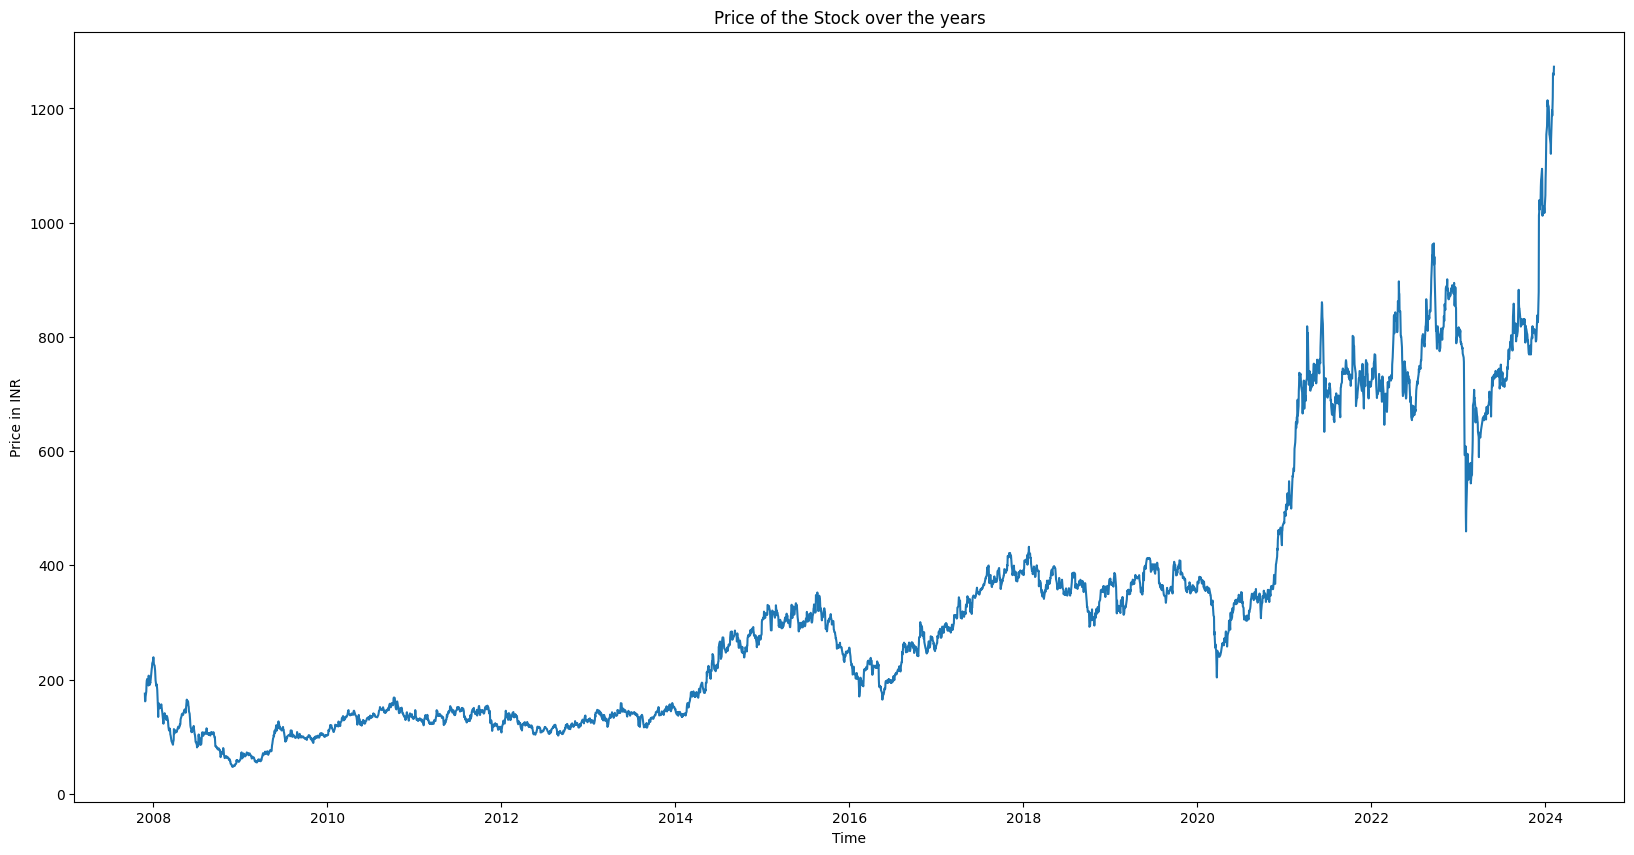

In [283]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Price of the Stock over the years")   #Plotting the Data
plt.plot(df['2000-11-01':'2024-02-06'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

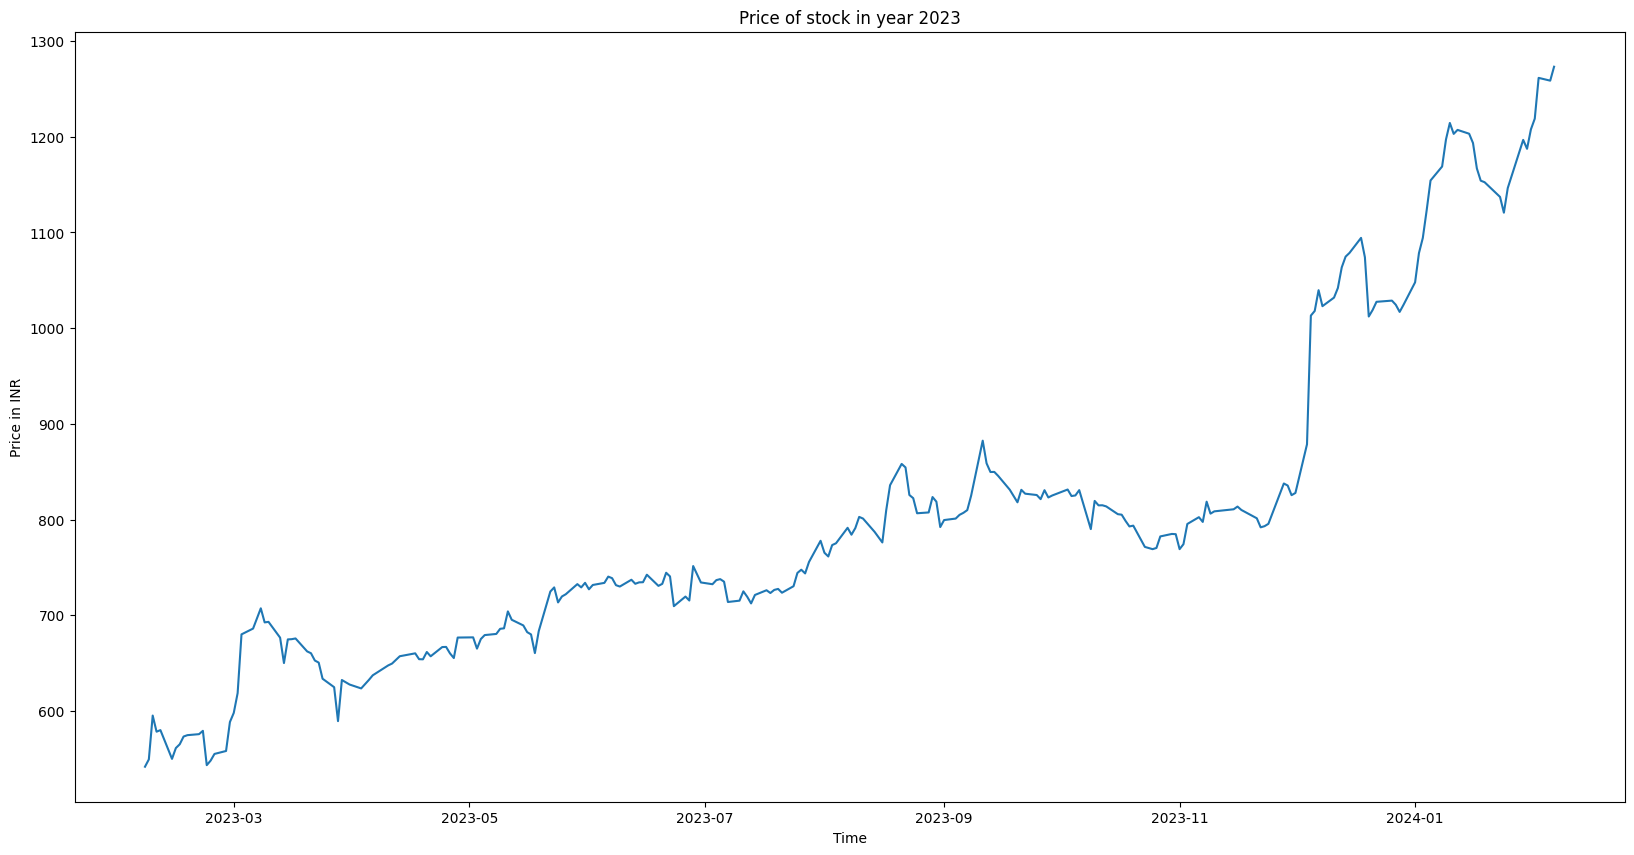

In [284]:
plt.figure(figsize=(20,10))
plt.title("Price of stock in year 2023")
plt.plot(df['2023-02-06':'2024-02-06'])   #Plotting 1 year data
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [285]:
data=df.values
print(len(data)) #Data Segregation
data

4026


array([[ 175.27441406],
       [ 161.74960327],
       [ 162.11509705],
       ...,
       [1304.19995117],
       [1322.80004883],
       [1341.84997559]])

In [286]:
import math
train_len=math.ceil(len(data)*0.96)  #Determining Training Length
train_len

3865

In [287]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=min_max_scalar.fit_transform(data)  #Scaling data to Decimals
print(len(scaled_data))
scaled_data

4026


array([[0.0988218 ],
       [0.08838062],
       [0.08866278],
       ...,
       [0.97035509],
       [0.98471441],
       [0.999421  ]])

In [288]:
train_data=scaled_data[0:train_len,:]
print(len(train_data))                      #Storing training data
train_data

3865


array([[0.0988218 ],
       [0.08838062],
       [0.08866278],
       ...,
       [0.54691179],
       [0.56401161],
       [0.55436158]])

In [289]:
x_train=[]
y_train=[]
interval=60
for i in range(interval,len(train_data)):            #Determining the X_train and Y_train
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [290]:
x_train

[array([0.0988218 , 0.08838062, 0.08866278, 0.09458887, 0.10178485,
        0.11152056, 0.11645899, 0.11731967, 0.11871653, 0.11498451,
        0.11109724, 0.1098133 , 0.12311172, 0.1197042 , 0.11085036,
        0.11085036, 0.11404621, 0.11310086, 0.12673085, 0.13281213,
        0.13447003, 0.13975412, 0.14253374, 0.14649151, 0.14798718,
        0.14352141, 0.13851955, 0.13667115, 0.13350351, 0.13003958,
        0.12175717, 0.11671998, 0.10956637, 0.11159819, 0.10889614,
        0.10755571, 0.10384485, 0.07992183, 0.0672936 , 0.0844299 ,
        0.07838387, 0.08565743, 0.07932219, 0.08213707, 0.08068375,
        0.08169965, 0.07996418, 0.0843029 , 0.08122699, 0.07744557,
        0.07585819, 0.07413683, 0.0638579 , 0.05963909, 0.05817875,
        0.0636604 , 0.06633412, 0.07238019, 0.07129372, 0.06680687]),
 array([0.08838062, 0.08866278, 0.09458887, 0.10178485, 0.11152056,
        0.11645899, 0.11731967, 0.11871653, 0.11498451, 0.11109724,
        0.1098133 , 0.12311172, 0.1197042 , 0.

In [291]:
y_train

[0.06758284472396237,
 0.06566398230425627,
 0.06335699829011163,
 0.06732889530873512,
 0.06882453226270766,
 0.06760404840461035,
 0.06730777408684524,
 0.06217181267038189,
 0.05793887478333667,
 0.05393877097954008,
 0.049543583706158835,
 0.048330150071876944,
 0.051511880151331145,
 0.048577061043111304,
 0.043412898731386144,
 0.04266509203422245,
 0.03567372021239209,
 0.0343967933343921,
 0.0337406925560309,
 0.02971236429732734,
 0.033656030971132574,
 0.034629609747906846,
 0.03631572643303368,
 0.05087694771415017,
 0.0451695647739578,
 0.04706734131124173,
 0.04934605375118909,
 0.048492411238035556,
 0.04720841646648625,
 0.04723664681130451,
 0.0467075384102908,
 0.04785042857703913,
 0.04938132254000021,
 0.04960707694987692,
 0.05417156383340966,
 0.05344491958751491,
 0.051885801169646854,
 0.05453844051782122,
 0.05745912383894241,
 0.05757906599247444,
 0.05737449170360053,
 0.06399191894747003,
 0.06742061300736019,
 0.06800616442827656,
 0.07076462192270688,
 0.07

In [292]:
import numpy as np
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))  #Data Reshaping
print(x_train.shape)
x_train

(3805, 60, 1)


array([[[0.0988218 ],
        [0.08838062],
        [0.08866278],
        ...,
        [0.07238019],
        [0.07129372],
        [0.06680687]],

       [[0.08838062],
        [0.08866278],
        [0.09458887],
        ...,
        [0.07129372],
        [0.06680687],
        [0.06758284]],

       [[0.08866278],
        [0.09458887],
        [0.10178485],
        ...,
        [0.06680687],
        [0.06758284],
        [0.06566398]],

       ...,

       [[0.48477388],
        [0.48795632],
        [0.48887651],
        ...,
        [0.53806976],
        [0.54067706],
        [0.53768635]],

       [[0.48795632],
        [0.48887651],
        [0.4930175 ],
        ...,
        [0.54067706],
        [0.53768635],
        [0.54691179]],

       [[0.48887651],
        [0.4930175 ],
        [0.49340091],
        ...,
        [0.53768635],
        [0.54691179],
        [0.56401161]]])

In [293]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [294]:
model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(75,return_sequences=True))
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=64))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\laksh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - loss: 0.0158
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - loss: 4.1636e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - loss: 2.3420e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - loss: 2.5132e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - loss: 2.6240e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 2.1742e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - loss: 2.1676e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 2.0481e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - loss: 2.1134e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - loss: 2.2148e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - loss: 1.8651e-04
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 1.9395e-04
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 1.8415e-04
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - loss: 1.8465e-04
Epo

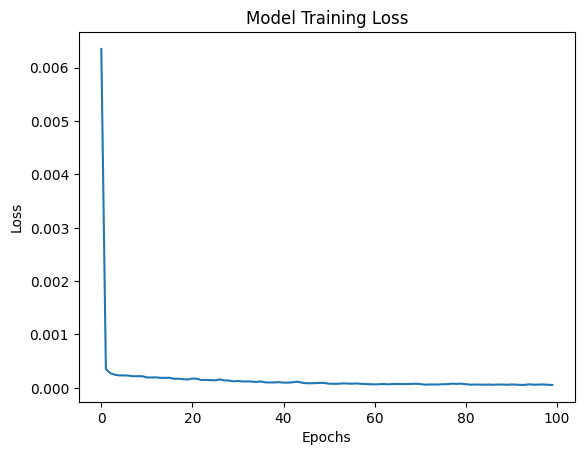

In [295]:
history=model.fit(x_train,y_train,batch_size=128,epochs=100)
import matplotlib.pyplot as plt

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [296]:
test_data=scaled_data[train_len-interval:,:]
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):              #Preparing test Data
  x_test.append(test_data[i-interval:i,0])

In [297]:
y_test

array([[ 761.45001221],
       [ 773.34997559],
       [ 775.25      ],
       [ 791.40002441],
       [ 784.20001221],
       [ 791.09997559],
       [ 802.79998779],
       [ 801.04998779],
       [ 787.15002441],
       [ 776.09997559],
       [ 809.65002441],
       [ 835.90002441],
       [ 858.15002441],
       [ 854.5       ],
       [ 825.70001221],
       [ 822.34997559],
       [ 806.59997559],
       [ 807.45001221],
       [ 823.54998779],
       [ 818.70001221],
       [ 792.20001221],
       [ 799.5       ],
       [ 801.04998779],
       [ 804.95001221],
       [ 807.04998779],
       [ 809.90002441],
       [ 825.        ],
       [ 882.45001221],
       [ 858.75      ],
       [ 849.70001221],
       [ 849.79998779],
       [ 845.65002441],
       [ 831.25      ],
       [ 818.04998779],
       [ 831.09997559],
       [ 827.04998779],
       [ 825.65002441],
       [ 821.34997559],
       [ 830.70001221],
       [ 823.09997559],
       [ 825.15002441],
       [ 831.400

In [298]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.4930175 ],
        [0.49340091],
        [0.5070508 ],
        ...,
        [0.54691179],
        [0.56401161],
        [0.55436158]],

       [[0.49340091],
        [0.5070508 ],
        [0.50030256],
        ...,
        [0.56401161],
        [0.55436158],
        [0.5513508 ]],

       [[0.5070508 ],
        [0.50030256],
        [0.49573982],
        ...,
        [0.55436158],
        [0.5513508 ],
        [0.5605376 ]],

       ...,

       [[0.75434886],
        [0.74859743],
        [0.75431022],
        ...,
        [0.9249614 ],
        [0.93812398],
        [0.95290785]],

       [[0.74859743],
        [0.75431022],
        [0.77245228],
        ...,
        [0.93812398],
        [0.95290785],
        [0.97035509]],

       [[0.75431022],
        [0.77245228],
        [0.79603699],
        ...,
        [0.95290785],
        [0.97035509],
        [0.98471441]]])

In [299]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions) #Predictions
predictions[0:5]

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


array([[765.5367 ],
       [757.0176 ],
       [767.85406],
       [772.7926 ],
       [788.63434]], dtype=float32)

In [300]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)   # Root Mean Square Error
rmse_error

15.24655170322205

In [301]:
train_data=df[0:train_len]
valid_data=df[train_len:]                     #Combining Actual and Predicted Values
valid_data['predictions']=predictions
valid_data

C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\4003490701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


,Close,predictions
Date,,
2023-08-02 00:00:00+05:30,761.450012,765.536682
2023-08-03 00:00:00+05:30,773.349976,757.017578
2023-08-04 00:00:00+05:30,775.250000,767.854065
2023-08-07 00:00:00+05:30,791.400024,772.792603
2023-08-08 00:00:00+05:30,784.200012,788.634338
...,...,...
2024-03-21 00:00:00+05:30,1262.449951,1214.721313
2024-03-22 00:00:00+05:30,1281.599976,1241.882935
2024-03-26 00:00:00+05:30,1304.199951,1263.583008


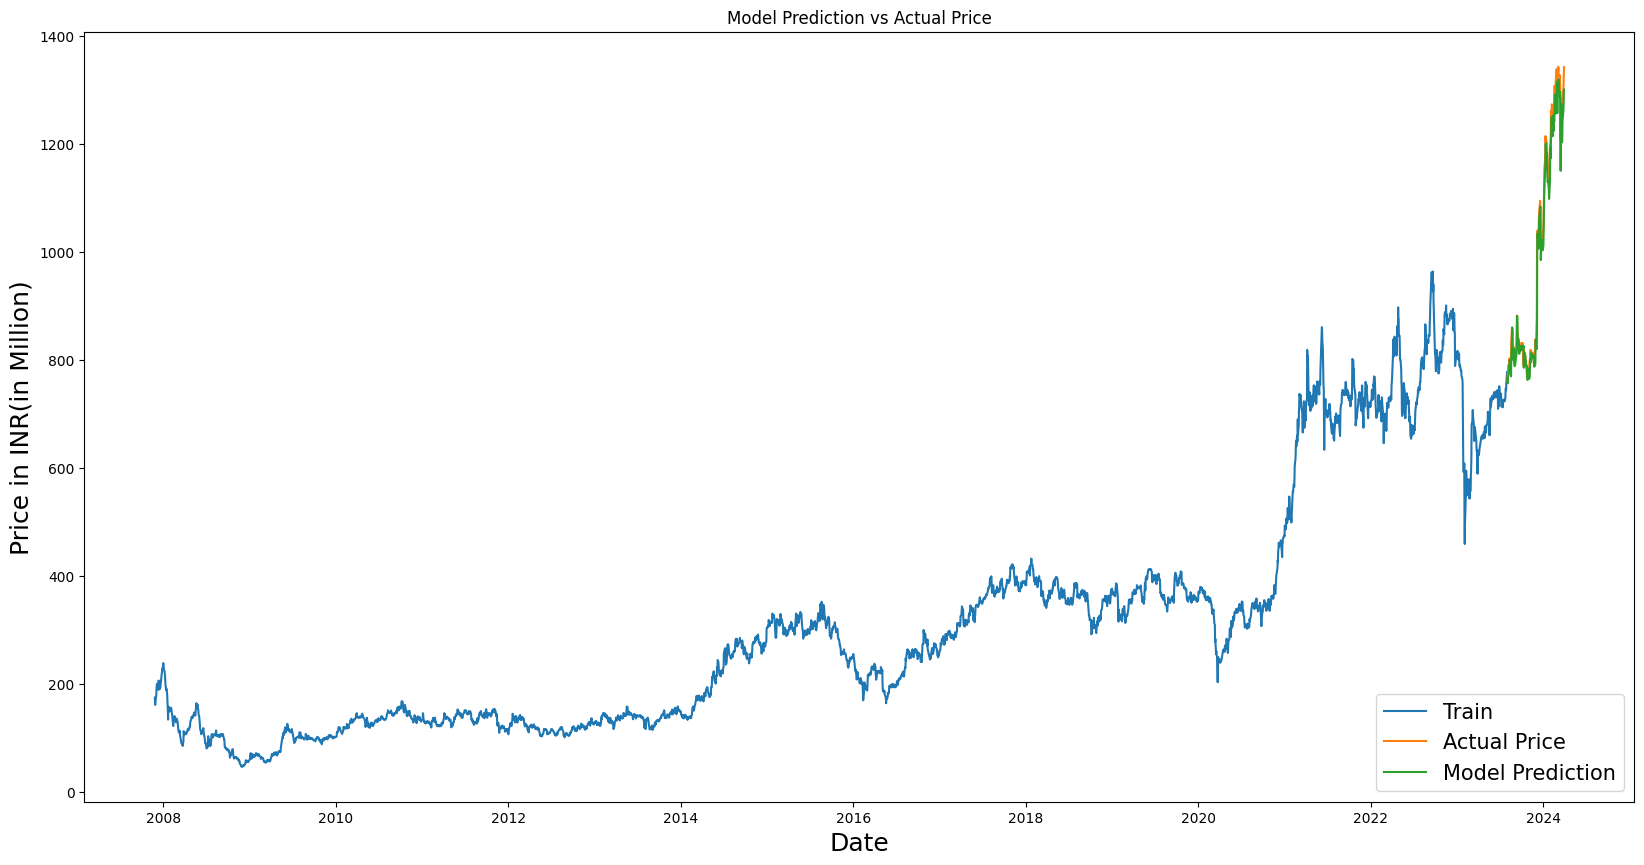

In [302]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

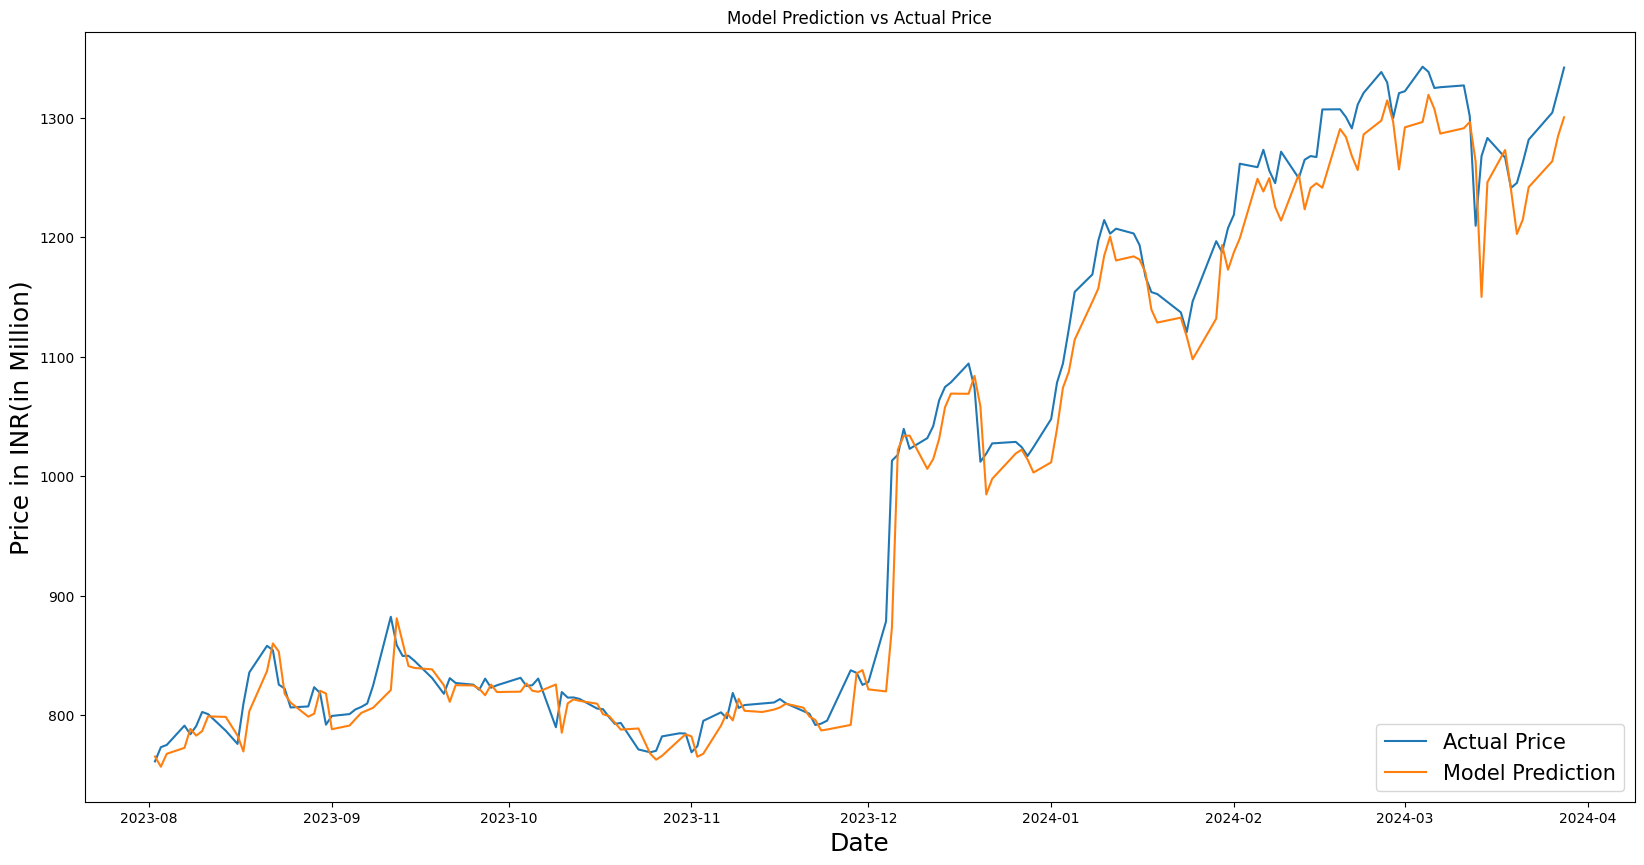

In [303]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])                                                        #Comparison Graph
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [304]:
close = valid_data['Close']
prediction = valid_data['predictions']
count = 0
risk = 0.01
for i in range(len(valid_data)):
  allowed_error = close[i]*risk
  difference = abs(prediction[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy = (count/len(valid_data))*100
print("Accuarcy: ",Accuracy)

Accuarcy:  40.993788819875775


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\4275419160.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  allowed_error = close[i]*risk
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\4275419160.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(prediction[i]-close[i])


In [305]:

# amount = float(input("Enter the amount you want to invest: "))
# time_period = int(input("Enter the time period for investment (in days): "))
# risk_percent = float(input("Enter the risk percent you are willing to take: "))

# # total_days = valid_data.shape[0]
# data = valid_data['predictions']
# index= [data.iloc[1:time_period].idxmax()]
# userdays = index
# useramount = amount

# count = useramount/valid_data['Close'][0]
# profit  = (data[userdays] * count) - useramount
# profit

In [306]:
# islow = False;
# ishigh = False;

# predictions = valid_data['predictions']
# actual = valid_data['Close']

# left = predictions[0]
# number  = amount / left
# profit = 0 ;
# transactions =0
# arr =[]
# for x in range(time_period):
#   if(abs(left-actual[x])>= left*2/100):
#     profit = profit + abs(left-actual[x])*number
#     arr.append(abs(left-actual[x])*number)
#     left = actual[x]
#     number = amount/left
#     transactions = transactions+1
# print(transactions)
# for x in arr:
#   print(x)
# print("Profit Amount: ",profit)



# RNN

In [307]:
data=df.values
import math
train_len=math.ceil(len(data)*0.96)  #Determining Training Length
train_len
min_max_scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=min_max_scalar.fit_transform(data)
train_data=scaled_data[0:train_len,:]
x_train=[]
y_train=[]
interval=60
for i in range(interval,len(train_data)):            #Determining the X_train and Y_train
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])
import numpy as np
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))  #Data Reshaping


In [308]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

rnnmodel = Sequential()
rnnmodel.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
rnnmodel.add(SimpleRNN(64))
rnnmodel.add(Dense(50))
rnnmodel.add(Dense(1))
rnnmodel.compile(optimizer='adam', loss='mean_squared_error')

history = rnnmodel.fit(x_train, y_train, batch_size=128, epochs=100)

Epoch 1/100


C:\Users\laksh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0911
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 9.8006e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 2.0272e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 1.8196e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 1.8168e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 1.5624e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 1.7572e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 1.5574e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 1.5394e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 1.6415e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 1.3945e-04
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.8944e-04
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.9523e-04
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 1.9872e-04
Epoch 15/100
30/3

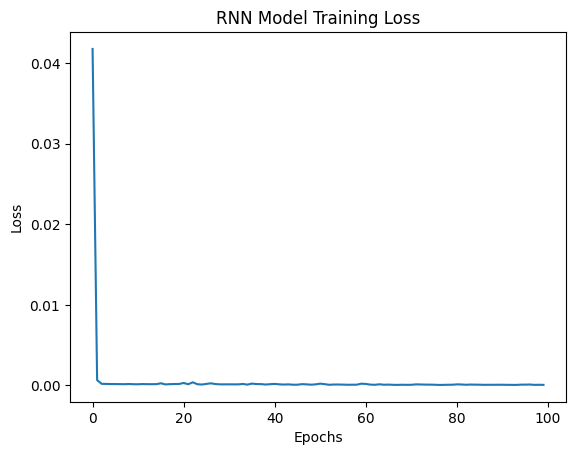

In [309]:
import matplotlib.pyplot as plt

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('RNN Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [310]:
test_data=scaled_data[train_len-interval:,:]
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):              #Preparing test Data
  x_test.append(test_data[i-interval:i,0])

In [311]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.4930175 ],
        [0.49340091],
        [0.5070508 ],
        ...,
        [0.54691179],
        [0.56401161],
        [0.55436158]],

       [[0.49340091],
        [0.5070508 ],
        [0.50030256],
        ...,
        [0.56401161],
        [0.55436158],
        [0.5513508 ]],

       [[0.5070508 ],
        [0.50030256],
        [0.49573982],
        ...,
        [0.55436158],
        [0.5513508 ],
        [0.5605376 ]],

       ...,

       [[0.75434886],
        [0.74859743],
        [0.75431022],
        ...,
        [0.9249614 ],
        [0.93812398],
        [0.95290785]],

       [[0.74859743],
        [0.75431022],
        [0.77245228],
        ...,
        [0.93812398],
        [0.95290785],
        [0.97035509]],

       [[0.75431022],
        [0.77245228],
        [0.79603699],
        ...,
        [0.95290785],
        [0.97035509],
        [0.98471441]]])

In [312]:
predict_rnn = rnnmodel.predict(x_test)
predict_rnn = min_max_scalar.inverse_transform(predict_rnn)  # Predictions
predict_rnn[0:5]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[759.9138],
       [758.7304],
       [764.3945],
       [767.3459],
       [782.3353]], dtype=float32)

In [313]:
rmse_error=np.sqrt(np.mean(predict_rnn-y_test)**2)   # Root Mean Square Error
rmse_error

27.518746891377134

In [314]:
train_data=df[0:train_len]
valid_data_rnn=df[train_len:]                     #Combining Actual and Predicted Values
valid_data_rnn['predictions']=predict_rnn
valid_data_rnn

C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2393658169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_rnn['predictions']=predict_rnn


,Close,predictions
Date,,
2023-08-02 00:00:00+05:30,761.450012,759.913818
2023-08-03 00:00:00+05:30,773.349976,758.730408
2023-08-04 00:00:00+05:30,775.250000,764.394470
2023-08-07 00:00:00+05:30,791.400024,767.345886
2023-08-08 00:00:00+05:30,784.200012,782.335327
...,...,...
2024-03-21 00:00:00+05:30,1262.449951,1199.576782
2024-03-22 00:00:00+05:30,1281.599976,1210.433105
2024-03-26 00:00:00+05:30,1304.199951,1225.894287


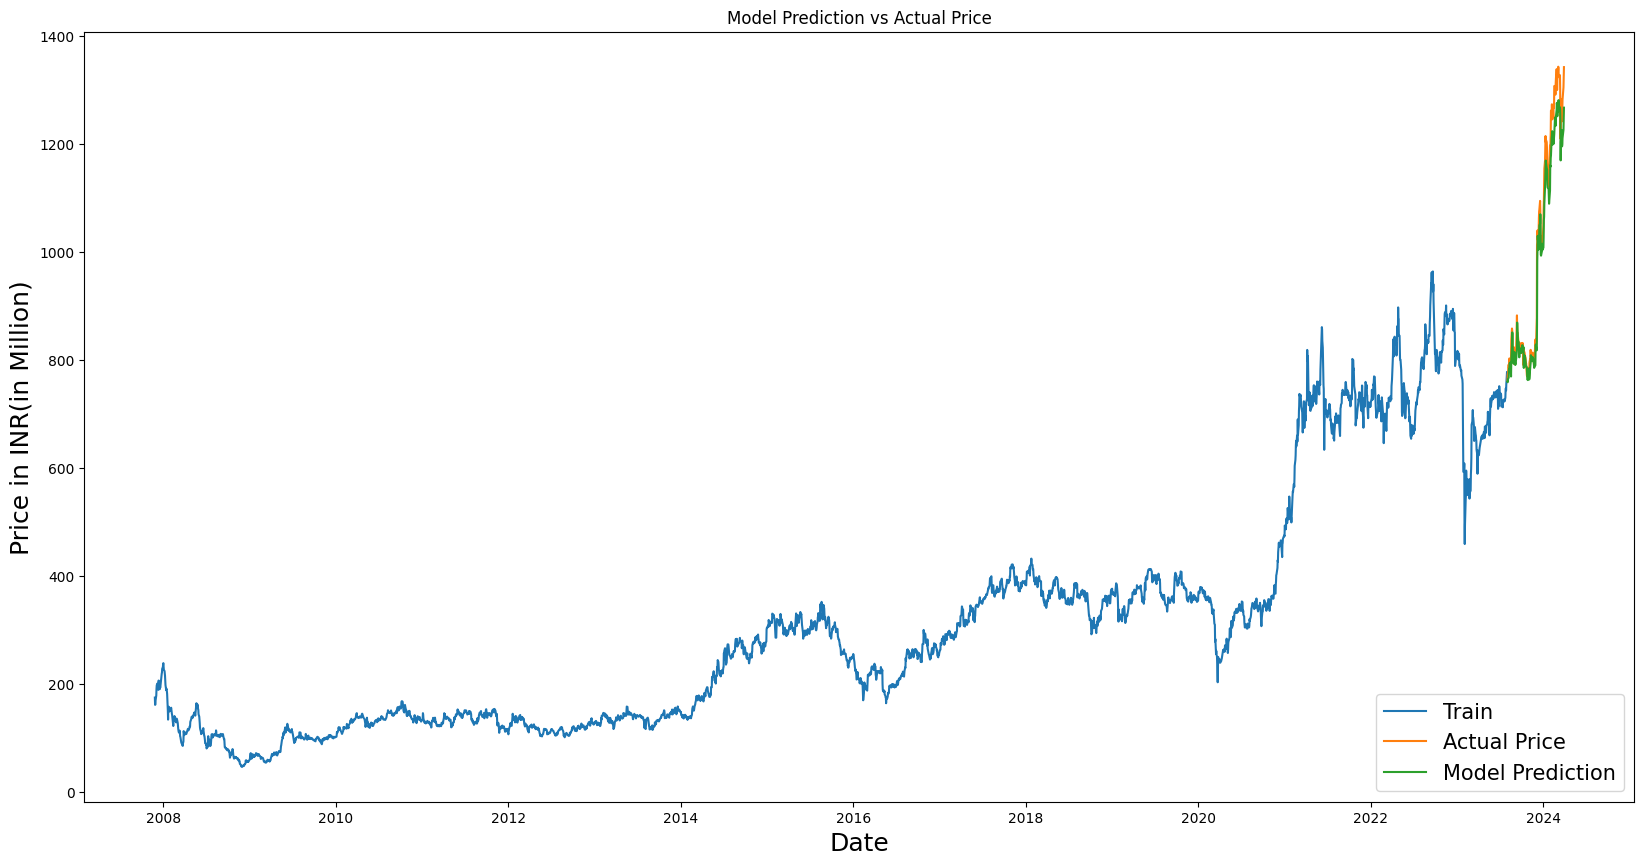

In [315]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data_rnn['Close'])
plt.plot(valid_data_rnn['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [316]:
closernn = valid_data_rnn['Close']
predictionrnn = valid_data_rnn['predictions']
count = 0
risk = 0.01
for i in range(len(valid_data_rnn)):
  allowed_error = close[i]*risk
  difference = abs(predictionrnn[i]-closernn[i])
  if difference < allowed_error:
    count=count+1
Accuracy = (count/len(valid_data_rnn))*100
print("Accuarcy: ",Accuracy)

Accuarcy:  24.84472049689441


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2849181058.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  allowed_error = close[i]*risk
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2849181058.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(predictionrnn[i]-closernn[i])


In [317]:
# amount = float(input("Enter the amount you want to invest: "))
# time_period = int(input("Enter the time period for investment (in days): "))
# risk_percent = float(input("Enter the risk percent you are willing to take: "))

# # total_days = valid_data.shape[0]
# data = valid_data_rnn['predictions']
# index= [data.iloc[1:time_period].idxmax()]
# userdays = index
# useramount = amount

# count = useramount/valid_data_rnn['Close'][0]
# profit  = (data[userdays] * count) - useramount
# profit

In [318]:
# count = useramount/valid_data_rnn['Close'][0]
# profit  = (data[userdays] * count) - useramount
# profit

# islow = False;
# ishigh = False;

# predictions = valid_data_rnn['predictions']
# actual = valid_data_rnn['Close']

# left = predictionrnn[0]
# number  = amount / left
# profit = 0 ;
# transactions =0
# arr =[]
# for x in range(time_period):
#   if(abs(left-actual[x])>= left*2/100):
#     profit = profit + abs(left-actual[x])*number
#     arr.append(abs(left-actual[x])*number)
#     left = actual[x]
#     number = amount/left
#     transactions = transactions+1
# print(transactions)
# for x in arr:
#   print(x)
# print("Profit Amount: ",profit)

# GRU

In [319]:
data=df.values
import math
train_len=math.ceil(len(data)*0.96)  #Determining Training Length
train_len
min_max_scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=min_max_scalar.fit_transform(data)
train_data=scaled_data[0:train_len,:]
x_train=[]
y_train=[]
interval=60
for i in range(interval,len(train_data)):            #Determining the X_train and Y_train
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])
import numpy as np
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))  #Data Reshaping


In [320]:
from keras.models import Sequential
from keras.layers import GRU, Dense


In [321]:
grumodel = Sequential()
grumodel.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
grumodel.add(GRU(64))
grumodel.add(Dense(50))
grumodel.add(Dense(1))
grumodel.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\laksh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [322]:
history = grumodel.fit(x_train, y_train, batch_size=128, epochs=100)

Epoch 1/100


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - loss: 0.0147
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 3.1889e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 1.4120e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 1.0502e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - loss: 1.1914e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 8.8355e-05
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - loss: 9.5493e-05
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 9.4220e-05
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - loss: 9.2993e-05
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 9.7700e-05
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - loss: 8.3979e-05
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 7.8368e-05
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - loss: 8.6142e-05
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 9.5400e-05
Epo

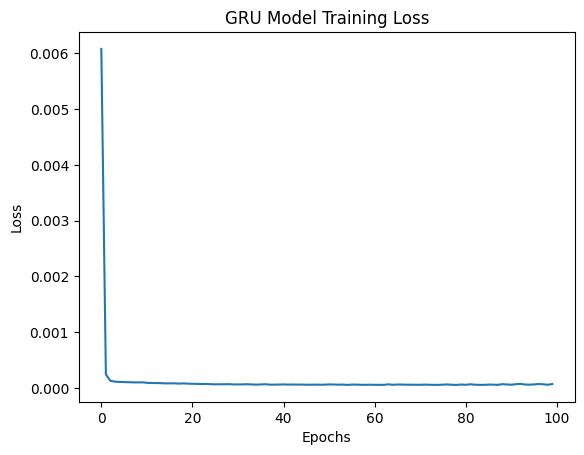

In [323]:
# Plot training loss values
plt.plot(history.history['loss'])
plt.title('GRU Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [324]:
test_data = scaled_data[train_len - interval:, :]
x_test = []
y_test = data[train_len:, :]
for i in range(interval, len(test_data)):              # Preparing test Data
    x_test.append(test_data[i - interval:i, 0])


In [325]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [326]:
predict_gru = grumodel.predict(x_test)
predict_gru = min_max_scalar.inverse_transform(predict_gru)  # Predictions
predict_gru[0:5]

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


array([[762.2324],
       [759.405 ],
       [771.8467],
       [772.986 ],
       [790.0306]], dtype=float32)

In [327]:
rmse_error=np.sqrt(np.mean(predict_gru-y_test)**2)   # Root Mean Square Error
rmse_error

9.133875876480008

In [328]:
train_data=df[0:train_len]
valid_data_gru=df[train_len:]                     #Combining Actual and Predicted Values
valid_data_gru['predictions']=predict_gru
valid_data_gru

C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2458044195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_gru['predictions']=predict_gru


,Close,predictions
Date,,
2023-08-02 00:00:00+05:30,761.450012,762.232422
2023-08-03 00:00:00+05:30,773.349976,759.405029
2023-08-04 00:00:00+05:30,775.250000,771.846680
2023-08-07 00:00:00+05:30,791.400024,772.986023
2023-08-08 00:00:00+05:30,784.200012,790.030579
...,...,...
2024-03-21 00:00:00+05:30,1262.449951,1235.753662
2024-03-22 00:00:00+05:30,1281.599976,1253.750366
2024-03-26 00:00:00+05:30,1304.199951,1272.797729


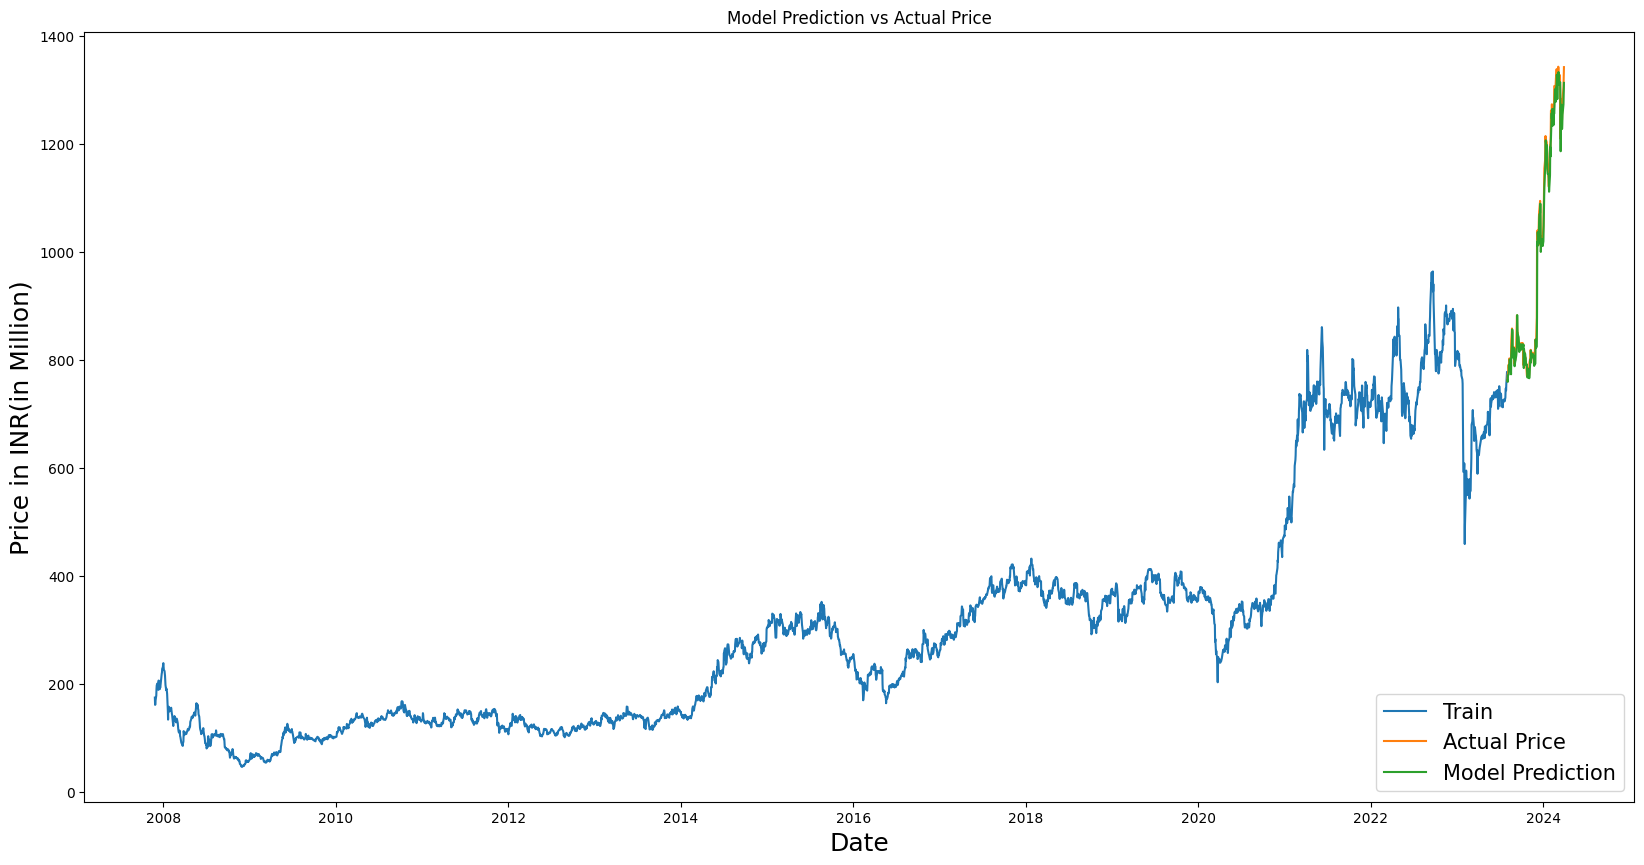

In [329]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data_gru['Close'])
plt.plot(valid_data_gru['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [330]:
risk = 0.01
for i in range(len(valid_data_gru)):
  allowed_error = close[i]*risk
  difference = abs(predict_gru[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy = (count/len(valid_data_gru))*100
print("Accuarcy: ",Accuracy)

Accuarcy:  72.67080745341616


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\3808126348.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  allowed_error = close[i]*risk
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\3808126348.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(predict_gru[i]-close[i])


In [331]:
# amount = float(input("Enter the amount you want to invest: "))
# time_period = int(input("Enter the time period for investment (in days): "))
# risk_percent = float(input("Enter the risk percent you are willing to take: "))

# # total_days = valid_data.shape[0]
# data = valid_data_gru['predictions']
# index= [data.iloc[1:time_period].idxmax()]
# userdays = index
# useramount = amount

# count = useramount/valid_data_gru['Close'][0]
# profit  = (data[userdays] * count) - useramount
# profit

In [332]:
# islow = False;
# ishigh = False;

# predictions = valid_data_gru['predictions']
# actual = valid_data_gru['Close']

# left = predict_gru[0]
# number  = amount / left
# profit = 0 ;
# transactions =0
# arr =[]
# for x in range(time_period):
#   if(abs(left-actual[x])>= left*2/100):
#     profit = profit + abs(left-actual[x])*number
#     arr.append(abs(left-actual[x])*number)
#     left = actual[x]
#     number = amount/left
#     transactions = transactions+1
# print(transactions)
# for x in arr:
#   print(x)
# print("Profit Amount: ",profit)


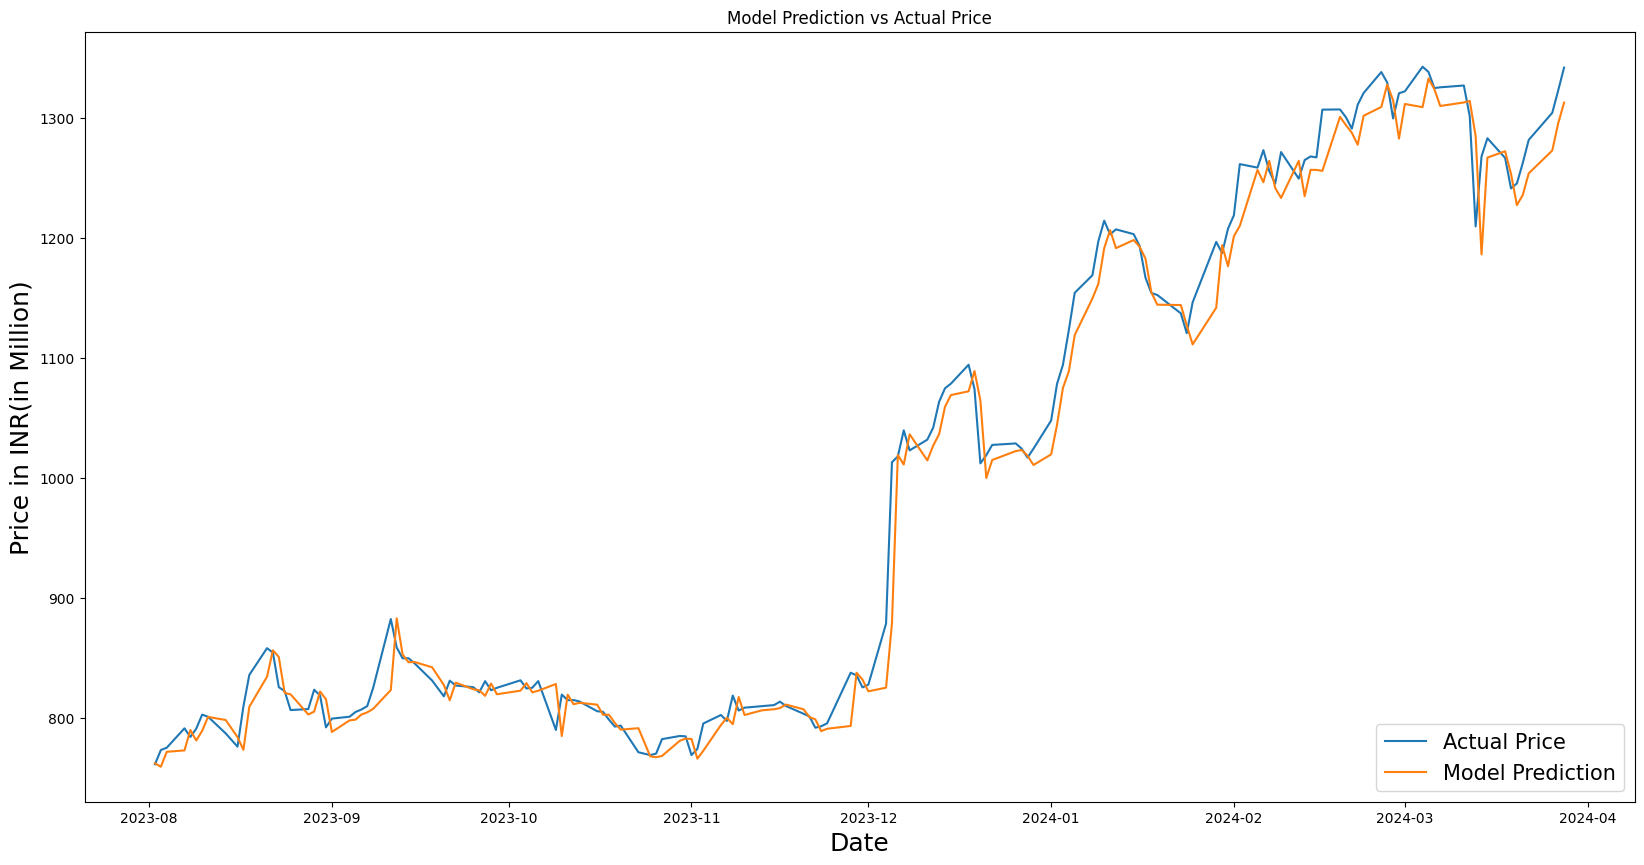

In [333]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data_gru['Close'])                                                        #Comparison Graph
plt.plot(valid_data_gru['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

## *BIDIRECTIONAL*

In [334]:
data=df.values
print(len(data)) #Data Segregation


4026


In [335]:
import math
train_len=math.ceil(len(data)*0.96)  #Determining Training Length
train_len

min_max_scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=min_max_scalar.fit_transform(data)  #Scaling data to Decimals
print(len(scaled_data))
scaled_data

train_data=scaled_data[0:train_len,:]
print(len(train_data))                      #Storing training data
train_data

x_train=[]
y_train=[]
interval=60
for i in range(interval,len(train_data)):            #Determining the X_train and Y_train
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])


import numpy as np
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))  #Data Reshaping
print(x_train.shape)
x_train

4026
3865
(3805, 60, 1)


array([[[0.0988218 ],
        [0.08838062],
        [0.08866278],
        ...,
        [0.07238019],
        [0.07129372],
        [0.06680687]],

       [[0.08838062],
        [0.08866278],
        [0.09458887],
        ...,
        [0.07129372],
        [0.06680687],
        [0.06758284]],

       [[0.08866278],
        [0.09458887],
        [0.10178485],
        ...,
        [0.06680687],
        [0.06758284],
        [0.06566398]],

       ...,

       [[0.48477388],
        [0.48795632],
        [0.48887651],
        ...,
        [0.53806976],
        [0.54067706],
        [0.53768635]],

       [[0.48795632],
        [0.48887651],
        [0.4930175 ],
        ...,
        [0.54067706],
        [0.53768635],
        [0.54691179]],

       [[0.48887651],
        [0.4930175 ],
        [0.49340091],
        ...,
        [0.53768635],
        [0.54691179],
        [0.56401161]]])

In [336]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

C:\Users\laksh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 349ms/step - loss: 0.0155
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - loss: 7.0231e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - loss: 3.7918e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 360ms/step - loss: 2.7313e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 355ms/step - loss: 2.3587e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - loss: 1.9336e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - loss: 1.6953e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - loss: 1.8822e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - loss: 1.5443e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 367ms/step - loss: 1.3740e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 368ms/step - loss: 1.4671e-04
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - loss: 1.4369e-04
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - loss: 1.3487e-04
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 372ms/s

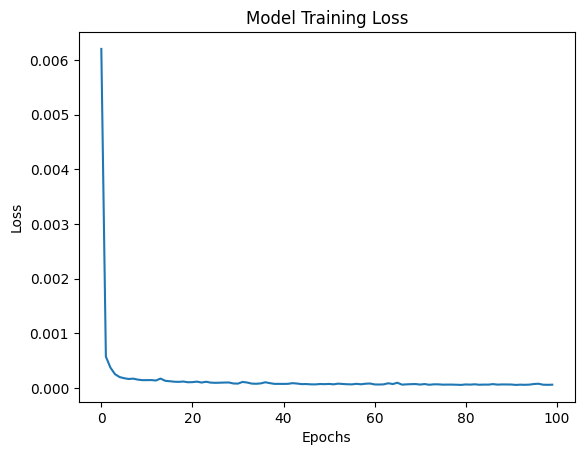

In [337]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, LSTM, Bidirectional
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))))

bilstm_model.add(Bidirectional(LSTM(units=64)))
bilstm_model.add(Dense(50))
bilstm_model.add(Dense(1))
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')

bilstm_history = bilstm_model.fit(x_train, y_train, batch_size=128, epochs=100)
# Plot training loss values
plt.plot(bilstm_history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [338]:
test_data=scaled_data[train_len-interval:,:]
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):              #Preparing test Data
  x_test.append(test_data[i-interval:i,0])

y_test
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.4930175 ],
        [0.49340091],
        [0.5070508 ],
        ...,
        [0.54691179],
        [0.56401161],
        [0.55436158]],

       [[0.49340091],
        [0.5070508 ],
        [0.50030256],
        ...,
        [0.56401161],
        [0.55436158],
        [0.5513508 ]],

       [[0.5070508 ],
        [0.50030256],
        [0.49573982],
        ...,
        [0.55436158],
        [0.5513508 ],
        [0.5605376 ]],

       ...,

       [[0.75434886],
        [0.74859743],
        [0.75431022],
        ...,
        [0.9249614 ],
        [0.93812398],
        [0.95290785]],

       [[0.74859743],
        [0.75431022],
        [0.77245228],
        ...,
        [0.93812398],
        [0.95290785],
        [0.97035509]],

       [[0.75431022],
        [0.77245228],
        [0.79603699],
        ...,
        [0.95290785],
        [0.97035509],
        [0.98471441]]])

In [339]:
bilstm_predictions=bilstm_model.predict(x_test)
bilstm_predictions=min_max_scalar.inverse_transform(bilstm_predictions) #Predictions
bilstm_predictions[0:5]

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step


array([[773.7066 ],
       [766.66724],
       [772.5023 ],
       [776.7881 ],
       [790.7815 ]], dtype=float32)

In [340]:
bilstm_rmse_error=np.sqrt(np.mean(bilstm_predictions-y_test)**2)   # Root Mean Square Error
bilstm_rmse_error

7.323639863766498

In [341]:
valid_databi=df[train_len:]                     #Combining Actual and Predicted Values
valid_databi['bilstm_predictions']=bilstm_predictions
valid_databi

C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\3651051080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_databi['bilstm_predictions']=bilstm_predictions


,Close,bilstm_predictions
Date,,
2023-08-02 00:00:00+05:30,761.450012,773.706604
2023-08-03 00:00:00+05:30,773.349976,766.667236
2023-08-04 00:00:00+05:30,775.250000,772.502319
2023-08-07 00:00:00+05:30,791.400024,776.788086
2023-08-08 00:00:00+05:30,784.200012,790.781494
...,...,...
2024-03-21 00:00:00+05:30,1262.449951,1227.028320
2024-03-22 00:00:00+05:30,1281.599976,1243.578369
2024-03-26 00:00:00+05:30,1304.199951,1267.654907


In [342]:
close = valid_databi['Close']
prediction = valid_databi['bilstm_predictions']
count = 0
risk = 0.01
for i in range(len(valid_data)):
  allowed_error = close[i]*risk
  difference = abs(prediction[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy = (count/len(valid_databi))*100
print("Accuarcy: ",Accuracy)

Accuarcy:  40.37267080745342


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\1675688197.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  allowed_error = close[i]*risk
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\1675688197.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(prediction[i]-close[i])


# ENSEMBLING: AVERAGE

In [343]:
import numpy as np

# Assuming predictions, predict_rnn, and predict_gru are pandas Series
# predictions_np = predictions.to_numpy()
# predict_rnn_np = predict_rnn.to_numpy()
# predict_gru_np = predict_gru.to_numpy()

combined_predictions = (valid_data['predictions']+valid_data_gru['predictions']+valid_data_rnn['predictions']+valid_databi['bilstm_predictions']) / 4
# combined_predictions = combined_predictions.reshape(-1)


In [344]:
combined_predictions

Date
2023-08-02 00:00:00+05:30     765.347351
2023-08-03 00:00:00+05:30     760.455078
2023-08-04 00:00:00+05:30     769.149414
2023-08-07 00:00:00+05:30     772.478149
2023-08-08 00:00:00+05:30     787.945435
                                ...     
2024-03-21 00:00:00+05:30    1219.270020
2024-03-22 00:00:00+05:30    1237.411133
2024-03-26 00:00:00+05:30    1257.482544
2024-03-27 00:00:00+05:30    1279.623047
2024-03-28 00:00:00+05:30    1297.810547
Length: 161, dtype: float32

In [345]:
# combined_predictions
combine=df[train_len:]
combine['predgru'] = valid_data_gru['predictions']
combine['predrnn'] = valid_data_rnn['predictions']
combine['predlstm'] = valid_data['predictions']
combine['predbilstm']=valid_databi['bilstm_predictions']
combine['combined_predictions'] = combined_predictions

C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\89291291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine['predgru'] = valid_data_gru['predictions']
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\89291291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine['predrnn'] = valid_data_rnn['predictions']
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\89291291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [346]:
combine

,Close,predgru,predrnn,predlstm,predbilstm,combined_predictions
Date,,,,,,
2023-08-02 00:00:00+05:30,761.450012,762.232422,759.913818,765.536682,773.706604,765.347351
2023-08-03 00:00:00+05:30,773.349976,759.405029,758.730408,757.017578,766.667236,760.455078
2023-08-04 00:00:00+05:30,775.250000,771.846680,764.394470,767.854065,772.502319,769.149414
2023-08-07 00:00:00+05:30,791.400024,772.986023,767.345886,772.792603,776.788086,772.478149
2023-08-08 00:00:00+05:30,784.200012,790.030579,782.335327,788.634338,790.781494,787.945435
...,...,...,...,...,...,...
2024-03-21 00:00:00+05:30,1262.449951,1235.753662,1199.576782,1214.721313,1227.028320,1219.270020
2024-03-22 00:00:00+05:30,1281.599976,1253.750366,1210.433105,1241.882935,1243.578369,1237.411133
2024-03-26 00:00:00+05:30,1304.199951,1272.797729,1225.894287,1263.583008,1267.654907,1257.482544


In [347]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test is the actual target values
# Calculate RMSE for combined predictions
rmse_combined = np.sqrt(mean_squared_error(y_test, combined_predictions))

print("RMSE for combined predictions:", rmse_combined)


RMSE for combined predictions: 28.290937933791636


In [348]:
close = valid_data['Close']
prediction = combine['combined_predictions']
count = 0
risk = 0.01
for i in range(len(valid_data)):
  allowed_error = close[i]*risk
  difference = abs(prediction[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy = (count/len(valid_data))*100
print("Accuarcy: ",Accuracy)

Accuarcy:  40.993788819875775


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\3688111416.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  allowed_error = close[i]*risk
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\3688111416.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(prediction[i]-close[i])


In [349]:
# amount = float(input("Enter the amount you want to invest: "))
# time_period = int(input("Enter the time period for investment (in days): "))
# risk_percent = float(input("Enter the risk percent you are willing to take: "))

# # total_days = valid_data.shape[0]
# data = combine['combined_predictions']
# index= [data.iloc[1:time_period].idxmax()]
# userdays = index
# useramount = amount

# count = useramount/combine['combined_predictions'][0]
# profit  = (data[userdays] * count) - useramount
# profit

In [350]:
# islow = False;
# ishigh = False;

# predictions = combine['combined_predictions']
# actual = valid_data['Close']

# left = predictions[0]
# number  = amount / left
# profit = 0 ;
# transactions =0
# arr =[]
# for x in range(time_period):
#   if(abs(left-actual[x])>= left*2/100):
#     profit = profit + abs(left-actual[x])*number
#     arr.append(abs(left-actual[x])*number)
#     left = actual[x]
#     number = amount/left
#     transactions = transactions+1
# print(transactions)
# for x in arr:
#   print(x)
# print("Profit Amount: ",profit)


# ENSEMBLING: STACKING

In [351]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge


# stacked_predictions = np.column_stack((combine['predgru'],combine['predlstm'],combine['predrnn']))
# meta_model = Ridge()
# stacked_model = StackingRegressor(estimators=[('lstm', meta_model), ('rnn', meta_model), ('gru', meta_model)], final_estimator=meta_model)

# # Use the stacked model to make final predictions
# final_predictions = stacked_model.predict(stacked_predictions)

# # Calculate RMSE for the stacked predictions
# from sklearn.metrics import mean_squared_error
# rmse_stacked = np.sqrt(mean_squared_error(y_test, final_predictions))
# print("RMSE for stacked predictions:", rmse_stacked)

In [352]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming combine['predgru'], combine['predlstm'], combine['predrnn'] are your model predictions
# and y_test is your actual target values for the test set

# Stack your predictions as features
X_stacked = np.column_stack((combine['predgru'], combine['predlstm'], combine['predrnn'],combine['predbilstm']))

# Ensure y_test is in the correct format, e.g., a numpy array
y_test = y_test.values if hasattr(y_test, 'values') else y_test

# Define and fit the meta-model on your stacked predictions
meta_model = Ridge()
meta_model.fit(X_stacked, y_test)  # Note: In practice, you should fit on a training set, not the test set

# Since we fit directly on the test set (for demonstration), we skip a split here
# Predict on the same stacked features to evaluate (in practice, predict on a separate validation set)
final_predictions = meta_model.predict(X_stacked)
combine['finalstack'] = final_predictions
# Calculate RMSE for the stacked predictions
rmse_stacked = np.sqrt(mean_squared_error(y_test, final_predictions))
print("RMSE for stacked predictions:", rmse_stacked)


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\670346716.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine['finalstack'] = final_predictions


RMSE for stacked predictions: 21.246031395906225


In [353]:
combine

,Close,predgru,predrnn,predlstm,predbilstm,combined_predictions,finalstack
Date,,,,,,,
2023-08-02 00:00:00+05:30,761.450012,762.232422,759.913818,765.536682,773.706604,765.347351,762.104126
2023-08-03 00:00:00+05:30,773.349976,759.405029,758.730408,757.017578,766.667236,760.455078,764.884888
2023-08-04 00:00:00+05:30,775.250000,771.846680,764.394470,767.854065,772.502319,769.149414,776.769348
2023-08-07 00:00:00+05:30,791.400024,772.986023,767.345886,772.792603,776.788086,772.478149,776.384277
2023-08-08 00:00:00+05:30,784.200012,790.030579,782.335327,788.634338,790.781494,787.945435,794.936768
...,...,...,...,...,...,...,...
2024-03-21 00:00:00+05:30,1262.449951,1235.753662,1199.576782,1214.721313,1227.028320,1219.270020,1256.363770
2024-03-22 00:00:00+05:30,1281.599976,1253.750366,1210.433105,1241.882935,1243.578369,1237.411133,1267.170288
2024-03-26 00:00:00+05:30,1304.199951,1272.797729,1225.894287,1263.583008,1267.654907,1257.482544,1280.524292


In [354]:
# Accuracy = 0
count = 0
close = valid_data['Close']
prediction = combine['finalstack']
risk = 0.01
for i in range(len(final_predictions)):
  allowed_error = close[i]*risk
  difference = abs(final_predictions[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy_final = (count/len(final_predictions))*100
print("Accuarcy: ",Accuracy_final)

Accuarcy:  49.68944099378882


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\899836222.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  allowed_error = close[i]*risk
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\899836222.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(final_predictions[i]-close[i])


In [355]:
# amount = float(input("Enter the amount you want to invest: "))
# time_period = int(input("Enter the time period for investment (in days): "))
# risk_percent = float(input("Enter the risk percent you are willing to take: "))

# # total_days = valid_data.shape[0]
# data = combine['finalstack']
# index= [data.iloc[1:time_period].idxmax()]
# userdays = index
# useramount = amount

# count = useramount/combine['finalstack'][0]
# profit  = (data[userdays] * count) - useramount
# profit

In [356]:
# islow = False
# ishigh = False

# predictions = combine['finalstack']
# actual = valid_data['Close']

# # x = (combine['finalstack'][x],combine['predgru'][x],combine['predrnn'][x],combine['predlstm'][x],combine['predbilstm'][x],combine['combined_predictions'][x])

# left = predictions[0]
# number  = amount / left
# profit = 0 
# transactions =0
# arr =[]
# for x in range(time_period):
#   if(max(abs(actual[x]-max(combine['finalstack'][x],combine['predgru'][x],combine['predrnn'][x],combine['predlstm'][x],combine['predbilstm'][x],combine['combined_predictions'][x])),abs(actual[x]-min(combine['finalstack'][x],combine['predgru'][x],combine['predrnn'][x],combine['predlstm'][x],combine['predbilstm'][x],combine['combined_predictions'][x])))>= left*2/100):
#     profit = profit + max(abs(actual[x]-max(combine['finalstack'][x],combine['predgru'][x],combine['predrnn'][x],combine['predlstm'][x],combine['predbilstm'][x],combine['combined_predictions'][x])),abs(actual[x]-min(combine['finalstack'][x],combine['predgru'][x],combine['predrnn'][x],combine['predlstm'][x],combine['predbilstm'][x],combine['combined_predictions'][x])))*number
#     arr.append(max(abs(actual[x]-max(combine['finalstack'][x],combine['predgru'][x],combine['predrnn'][x],combine['predlstm'][x],combine['predbilstm'][x],combine['combined_predictions'][x])),abs(actual[x]-min(combine['finalstack'][x],combine['predgru'][x],combine['predrnn'][x],combine['predlstm'][x],combine['predbilstm'][x],combine['combined_predictions'][x])))*number)
#     left = actual[x]
#     amount = amount + profit
#     number = amount/left
#     transactions = transactions+1
# print(transactions)
# for x in arr:
#   print(x)
# print("Profit Amount: ",profit)


# # islow = False;
# # ishigh = False;

# # predictions = combine['combined_predictions']
# # actual = valid_data['Close']

# # left = predictions[0]
# # number  = amount / left
# # profit = 0 ;
# # transactions =0
# # arr =[]
# # for x in range(time_period):
# #   if(abs(left-actual[x])>= left*2/100):
# #     profit = profit + abs(left-actual[x])*number
# #     arr.append(abs(left-actual[x])*number)
# #     left = actual[x]
# #     number = amount/left
# #     transactions = transactions+1
# # print(transactions)
# # for x in arr:
# #   print(x)
# # print("Profit Amount: ",profit)

# ADABOOST

In [357]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming combine['predgru'], combine['predlstm'], combine['predrnn'] are your model predictions
# and y_test is your actual target values for the test set

# Stack your predictions as features
X_stacked = np.column_stack((combine['predgru'], combine['predlstm'], combine['predrnn']))

# Ensure y_test is in the correct format, e.g., a numpy array
y_testtrail = y_test.values if hasattr(y_test, 'values') else y_test

# Initialize AdaBoost with a base estimator (DecisionTreeRegressor is commonly used)
base_estimator = DecisionTreeRegressor(max_depth=3)  # Adjust max_depth as needed
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit AdaBoost on the stacked predictions
adaboost_model.fit(X_stacked, y_test)  # Note: In practice, you should fit on a training set, not the test set

# Predict using the AdaBoost model
final_predictions_boost = adaboost_model.predict(X_stacked)
combine['finalboost'] = final_predictions_boost
# Calculate RMSE for the predictions
rmse_adaboost = np.sqrt(mean_squared_error(y_testtrail, final_predictions_boost))
print("RMSE for AdaBoost predictions:", rmse_adaboost)


RMSE for AdaBoost predictions: 18.04096895346471


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\111963966.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine['finalboost'] = final_predictions_boost


In [358]:
# Accuracy = 0
count = 0
close = valid_data['Close']
prediction = combine['finalboost']
risk = 0.5
for i in range(len(final_predictions_boost)):
  allowed_error = close[i]*risk
  difference = abs(final_predictions_boost[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy_final = (count/len(final_predictions_boost))*100
print("Accuarcy: ",Accuracy_final)

C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2198689685.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  allowed_error = close[i]*risk
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2198689685.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(final_predictions_boost[i]-close[i])


Accuarcy:  100.0


In [359]:
islow = False
ishigh = False

predictions = combine['finalboost']
actual = predictions
amount = 100000
time_period = 100
# x = (combine['finalstack'][x],combine['predgru'][x],combine['predrnn'][x],combine['predlstm'][x],combine['predbilstm'][x],combine['combined_predictions'][x])

left = predictions[0]
number  = amount / left
profit = 0 
transactions =0
arr =[]
for x in range(time_period):
  if(abs(left-actual[x])>= left*2/100):
    profit = profit + abs(left-actual[x])*number
    arr.append(abs(left-actual[x])*number)
    left = actual[x]
    amount = amount + abs(left-actual[x])*number
    number = amount/left
    transactions = transactions+1
print(transactions)
for x in arr:
  print(x)
print("Profit Amount: ",profit)

21
2353.777402129736
2771.7267689247246
2678.4924253306094
2752.2101661603947
11016.438842158848
8512.453417433286
4197.449090497244
2771.7267689247246
2678.4924253306094
2318.20232473308
2353.777402129736
2299.6487886149666
2353.777402129736
2771.7267689247246
2696.9740181137217
4381.354202626867
15483.04324068077
7998.02272282027
2754.96480754462
3582.8903751143644
5948.985269369201
Profit Amount:  94676.13462969224


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2331625668.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = predictions[0]
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2331625668.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(abs(left-actual[x])>= left*2/100):
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\2331625668.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  profit = profit + abs(left-actual[x])

In [360]:
import xgboost
from xgboost import XGBRegressor

# Initialize XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

# Fit XGBoost on the stacked predictions
xgb_model.fit(X_stacked, y_testtrail)  # Note: In practice, you should fit on a training set, not the test set

# Predict using the XGBoost model
final_predictions_xgb = xgb_model.predict(X_stacked)
combine['finalxgb'] = final_predictions_xgb

# Calculate RMSE for the predictions
rmse_xgb = np.sqrt(mean_squared_error(y_testtrail, final_predictions_xgb))
print("RMSE for XGBoost predictions:", rmse_xgb)


RMSE for XGBoost predictions: 3.933331050917871


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\3836481004.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine['finalxgb'] = final_predictions_xgb


In [363]:
# Accuracy = 0
count = 0
close = valid_data['Close']
prediction = combine['finalboost']
risk = 0.01
for i in range(len(final_predictions_boost)):
  allowed_error = close[i]*risk
  difference = abs(final_predictions_boost[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy_final = (count/len(final_predictions_boost))*100
print("Accuarcy: ",Accuracy_final)

Accuarcy:  45.962732919254655


C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\1331756831.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  allowed_error = close[i]*risk
C:\Users\laksh\AppData\Local\Temp\ipykernel_5100\1331756831.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = abs(final_predictions_boost[i]-close[i])


In [362]:
combine
combine.to_csv('ADANIPORTS_output.csv', index=False)